# Demo

<br><br>

## Test with sample user data

In [ ]:
#
# Load data and scaler
#

import sys
sys.path.append("..")

from helpers.loaders import load_data, load_scaler, load_model_calibrated_baseline

X_train, X_test, y_train, y_test = load_data()
scaler = load_scaler()
calibrated_model = load_model_calibrated_baseline()



import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")



import pandas as pd 
import numpy as np
from helpers.user_data import preprocess_user_data

#
# Test data Sample 0 
# - id: 3777
# - bmi: 36.4
#
sample_0_raw = {
    'gender': 1,
    'age': 28,
    'hypertension': 1,
    'heart_disease': 0,
    'weight_in_kg': 99.099,
    'height_in_m': 1.65,
    'smoking_status': "never smoked"
}


#
# Test data Sample 5
# - id: 27832
# - bmi: 29.7
#
sample_5_raw = {
    'gender': 1,
    'age': 51,
    'hypertension': 0,
    'heart_disease': 0,
    'weight_in_kg': 83.82528,
    'height_in_m': 1.68,
    'smoking_status': "smokes"
}



#
# Test data Sample 40
#
sample_40_raw = {
    'gender': 0,
    'age': 40,
    'hypertension': 0,
    'heart_disease': 0,
    'weight_in_kg': 112.0,
    'height_in_m': 1.90,
    'smoking_status': "never smoked"
}



#
# Test data Demo
#
sample_DEMO_raw = {
    'gender': 0,
    'age': 40,
    'hypertension': 0,
    'heart_disease': 0,
    'weight_in_kg': 90.0,
    'height_in_m': 1.80,
    'smoking_status': "never smoked"
}

# smoking_status:
# - Possible values: "Unknown", "formerly smoked", "never smoked", "smokes"

sample_processed = preprocess_user_data(**sample_DEMO_raw)

arr_sample_0 = np.array(list(sample_processed.values()))
df_user_data = pd.DataFrame([arr_sample_0], columns=X_train.columns)
y_test_proba_user = calibrated_model.predict_proba(df_user_data)[:, 1] # get probabilities of positive class (stroke risk)
print(f"\nPredicted stroke risk... {y_test_proba_user[0]*100:.2f}%\n\n")



Predicted stroke risk... 0.20%




In [26]:
weight_reduction_percentage = 10


def reduce_weight(sample, percent):
    new_sample = sample.copy()
    reduction_factor = 1 - (percent / 100)
    new_sample['weight_in_kg'] *= reduction_factor
    return new_sample


leaner = reduce_weight(sample_DEMO_raw, weight_reduction_percentage)



leaner_processed = preprocess_user_data(**sample_DEMO_raw)

arr_sample_0 = np.array(list(leaner_processed.values()))
df_user_data = pd.DataFrame([arr_sample_0], columns=X_train.columns)
y_test_proba_user = calibrated_model.predict_proba(df_user_data)[:, 1] # get probabilities of positive class (stroke risk)
print(f"\nPredicted stroke risk... {y_test_proba_user[0]*100:.2f}%\n\n")




Predicted stroke risk... 25.61%




In [27]:
# #
# #
# # Test with suggestions to reduce stroke risk (WIP)
# #
# #

# import pandas as pd

# # gender,age,hypertension,heart_disease,ever_married,Residence_type,bmi,stroke,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
# # 0,67.0,0,1,1,1,36.6,1,1,0,0,1,0,0

# # gender,age,hypertension,heart_disease,ever_married,Residence_type,bmi,work_Private,work_Self-employed,work_children,smoking_formerly smoked,smoking_never smoked,smoking_smokes
# # 0,-0.6609790780110205,0,0,0,1,-0.23668766488059428,1,0,0,0,0,1

# # Example user
# user_data = [0, -0.6609790780110205, 0, 0, 0, 1, -0.23668766488059428, 1, 0, 0, 0, 0, 1]
# df_user_data = pd.DataFrame([user_data], columns=X_train.columns)
# display(df_user_data)


# # Example user no smoking
# user_data_2 = [0, -0.6609790780110205, 0, 0, 0, 1, -0.23668766488059428, 1, 0, 0, 0, 0, 0]
# df_user_data_2 = pd.DataFrame([user_data_2], columns=X_train.columns)

# # Example user leaner
# user_data_3 = [0, -0.6609790780110205, 0, 0, 0, 1, -0.43668766488059428, 1, 0, 0, 0, 0, 1]
# df_user_data_3 = pd.DataFrame([user_data_3], columns=X_train.columns)

# # Example user leaner and no smoking
# user_data_4 = [0, -0.6609790780110205, 0, 0, 0, 1, -0.43668766488059428, 1, 0, 0, 0, 0, 0]
# df_user_data_4 = pd.DataFrame([user_data_4], columns=X_train.columns)



# y_test_proba_user = calibrated_model.predict_proba(df_user_data)[:, 1] # get probabilities of positive class (stroke risk)
# y_test_proba_user_2 = calibrated_model.predict_proba(df_user_data_2)[:, 1] # get probabilities of positive class (stroke risk)
# y_test_proba_user_3 = calibrated_model.predict_proba(df_user_data_3)[:, 1] # get probabilities of positive class (stroke risk)
# y_test_proba_user_4 = calibrated_model.predict_proba(df_user_data_4)[:, 1] # get probabilities of positive class (stroke risk)

# print(f"Predicted stroke risk... {y_test_proba_user[0]*100:.2f}% (example user)")
# print(f"Predicted stroke risk... {y_test_proba_user_2[0]*100:.2f}% (no smoking)")
# print(f"Predicted stroke risk... {y_test_proba_user_3[0]*100:.2f}% (leaner)")
# print(f"Predicted stroke risk... {y_test_proba_user_4[0]*100:.2f}% (leaner and no smoking)")


<br><br>


## SHAP (SHapley Additive exPlanations) 

SHAP (SHapley Additive exPlanations) helps explain why a model gives a certain prediction (eg. why someone got a 12% stroke risk).

It assigns a contribution value to each feature for a prediction.

<br>

In [28]:
#
#
# SHAP (WIP)
#
#


import shap

# Use the base model for SHAP explanations
explainer = shap.LinearExplainer(calibrated_model.fit(X_train, y_train), X_train)
shap_values = explainer.shap_values(X_test.iloc[[0]])

# Create waterfall plot
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0] if isinstance(shap_values, list) else shap_values[0],
    base_values=explainer.expected_value[0] if hasattr(explainer.expected_value, '__len__') else explainer.expected_value,
    data=X_test.iloc[0].values,
    feature_names=X_test.columns.tolist()
))

InvalidModelError: An unknown model type was passed: <class 'sklearn.calibration.CalibratedClassifierCV'>

In [ ]:
# Note: for SHAP, can also try KernelExplainer which is model-agnostic

# Number of background samples (trade-off speed vs accuracy)
# number_of_samples = 250  


Example SHAP:

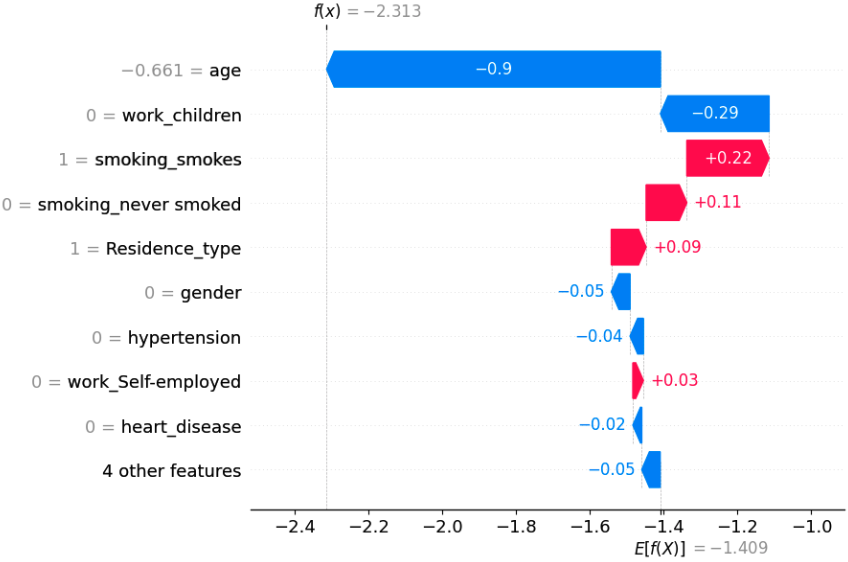